***Question 1***
Link Analysis

Pick a real-world network dataset (with number of nodes > 100) from here.
[2 points] Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’.
[28 points] Briefly describe the dataset chosen and report the following:
1. Number of Nodes
2. Number of Edges
3. Avg In-degree
4. Avg. Out-Degree
5. Node with Max In-degree
6. Node with Max out-degree
7. The density of the network
Further, perform the following tasks:
1. [5 points] Plot degree distribution of the network (in case of a directed graph, plot in-degree and
out-degree separately).
2. [10 points] Calculate the local clustering coefficient of each node and plot the clustering-coefficient
distribution of the network.

In [120]:
# Libraries

import csv
import cv2
# from google.colab import files
# !pip install nltk
# !pip install pandas
# !pip install numpy
# !pip install ipython-autotime
# from natsort import natsorted
import string
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#Importing dataset
import pandas as p
data= p.read_csv("/content/drive/MyDrive/IR_assignment3_data/Wiki-Vote.txt",sep="\t")

data.head()


,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


In [122]:
# Making list of source and destination nodes and edges
list_edges=[]
node1_l=[]
node2_l=[]
for k in range(0,len(data)):
  from_node=(data['FromNodeId'][k])

  node1_l.append(data['FromNodeId'][k])
  to_node= (data['ToNodeId'][k])

  node2_l.append(data['ToNodeId'][k])
  list_edges.append((from_node,to_node))

In [123]:
# Converting the lists of unique nodes into np arrays
x1=np.array(node1_l)
x2= np.unique(x1)
y1=np.array(node2_l)
y2= np.unique(y1)

In [124]:
# Making a list containing all nodes 
fin_nodes=set(x2.tolist()) | set(y2.tolist())

In [125]:
type(fin_nodes)

set

In [126]:
len(fin_nodes)

7115

In [127]:
graph_adjacency_list={}     # Dictionary where key is the source node and its value is list of nodes where an edge starting from the current node ends
graph_dest_list={}          # Dictionary where key is the destination node and its value is list of nodes where an edge ending at the current node starts
for i in range(0,len(list_edges)):
  x1=list_edges[i]
  source=x1[0]
  destination=x1[1]
  if destination in graph_dest_list:
    graph_dest_list[destination].append(source)
  else:
    graph_dest_list[destination]=[source]
  if source in graph_adjacency_list:
    graph_adjacency_list[source].append(destination)
  else:
    graph_adjacency_list[source]=[destination]
  

In [128]:
print(graph_adjacency_list) # adjcency list

{30: [1412, 3352, 5254, 5543, 7478], 3: [28, 30, 39, 54, 108, 152, 178, 182, 214, 271, 286, 300, 348, 349, 371, 567, 581, 584, 586, 590, 604, 611, 8283], 25: [3, 6, 8, 19, 23, 28, 29, 30, 33, 35, 50, 54, 55, 75, 80, 86, 94, 127, 152, 154, 182, 192, 214, 224, 226, 246, 252, 255, 257, 261, 271, 273, 280, 282, 286, 299, 300, 302, 306, 308, 310, 322, 325, 339, 348, 349, 356, 358, 363, 370, 371, 373, 377, 379, 407, 415, 422, 428, 439, 488, 514, 545, 549, 560, 590, 592, 600, 604, 611, 645, 650, 659, 664, 667, 673, 675, 696, 706, 723, 739, 756, 857, 864, 893, 959, 994, 1131, 3755, 8282, 8284], 4: [8, 10, 28, 30, 38, 55, 56, 75, 130, 140, 147, 151, 152, 214, 232, 243, 282, 299, 341, 363, 370, 415, 560, 606, 611, 645, 650, 659, 8282], 5: [6, 8, 10, 23, 30, 33, 38, 50, 54, 55, 61, 75, 89, 93, 127, 130, 147, 153, 163, 167, 168, 175, 299], 6: [3, 8, 10, 19, 23, 28, 29, 30, 33, 34, 35, 38, 39, 50, 54, 55, 56, 61, 80, 86, 89, 93, 94, 127, 130, 132, 135, 140, 147, 151, 153, 154, 163, 167, 168, 171, 1

In [129]:
# Creating the adjacency matrix
adjacency_matrix = np.zeros((max(fin_nodes)+1,max(fin_nodes)+1) , dtype=np.int64)# adjcacency matrix
for i in range(0,len(list_edges)): 
  x1=list_edges[i]
  source=x1[0]
  destination=x1[1] 
  adjacency_matrix[source][destination] = 1

In [130]:
print(len(adjacency_matrix))

8298


In [131]:
print("NO. of nodes are  ",len(fin_nodes) )

NO. of nodes are   7115


In [132]:
print("No. of edges are  ", len(data))

No. of edges are   103689


In [133]:
print("Avg In-degree - ", len(data)/len(fin_nodes))

Avg In-degree -  14.573295853829936


In [134]:
print("Avg out-degree - ", len(data)/len(fin_nodes))

Avg out-degree -  14.573295853829936


In [135]:

print("max in degree", max(np.sum(adjacency_matrix,axis=0)), " Node:",(np.where(np.sum(adjacency_matrix,axis=0)==np.amax(np.sum(adjacency_matrix,axis=0)))[0][0]))

max in degree 457  Node: 4037


In [136]:
print("max out degree", max(np.sum(adjacency_matrix,axis=1)), " Node:",(np.where(np.sum(adjacency_matrix,axis=1)==np.amax(np.sum(adjacency_matrix,axis=1)))[0][0]))

max out degree 893  Node: 2565


In [137]:

print("The density is",len(data)/((len(fin_nodes)-1)*len(fin_nodes)) )

The density is 0.0020485375110809584


In [138]:
# Calculating in degree, out degree, and average and maximum degrees
in_degree_tot={}
out_degree_tot={}
in_degree_average=0
out_degree_average=0
max_indegree= -5
max_outdegree=-5
max_indegree_node=-4
max_outdegree_node=-4
for node1 in fin_nodes:
  tot_incount=0
  tot_outcount=0
  for k in graph_adjacency_list:
    if node1 in graph_adjacency_list[k]:
      tot_incount=tot_incount+1
  for k in graph_adjacency_list:
        if node1==k:
            for z in graph_adjacency_list[k]:
              tot_outcount=tot_outcount+1
  in_degree_tot[node1]=tot_incount
  out_degree_tot[node1]=tot_outcount
  if(tot_incount> max_indegree):
    max_indegree=tot_incount
    max_indegree_node= node1
  if(tot_outcount> max_outdegree):
    max_outdegree=tot_outcount
    max_outdegree_node= node1
        
  in_degree_average=in_degree_average+tot_incount
  out_degree_average=out_degree_average+tot_outcount
in_degree_average=((float)(in_degree_average))/(float)(len(fin_nodes))
out_degree_average=((float)(out_degree_average))/(float)(len(fin_nodes))



In [139]:
print(in_degree_average)   # indegree average

14.573295853829936


[5 points] Plot degree distribution of the network (in case of a directed graph, plot in-degree and
out-degree separately).

In [140]:
print(out_degree_average) # out_degree_average

14.573295853829936


In [141]:
print("max in--degree", max_indegree, " is of  node",max_indegree_node)

max in--degree 457  is of  node 4037


In [142]:
print("max out--degree", max_outdegree, " is of  node",max_outdegree_node)

max out--degree 893  is of  node 2565


In degree

In [143]:
len1=len(fin_nodes)
deg_in=[]
g1=graph_dest_list.items()
print(g1)
for kf in g1:
  deg_in.append(len((kf[1])))
u1,c1=np.unique(deg_in,return_counts=True)
c1=c1.astype(float)
h=0
while(h< len(c1)):
  c1[h]=c1[h]/len1
  h=h+1;

c1

dict_items([(1412, [30, 11, 16, 173, 199, 150, 646, 853, 946, 996, 1006, 1009, 1210, 1235, 1248, 1278, 1335, 1338, 1346, 1355, 1403, 1404, 1405, 1411, 1406, 1407, 1408, 1409, 1410]), (3352, [30, 11, 24, 36, 42, 47, 53, 66, 72, 71, 87, 90, 68, 122, 127, 203, 291, 306, 310, 371, 383, 325, 432, 447, 457, 521, 546, 556, 600, 695, 742, 749, 763, 766, 784, 789, 805, 813, 825, 844, 842, 879, 988, 993, 1032, 1062, 1075, 1097, 1111, 1113, 1127, 1132, 1133, 1151, 1166, 1167, 1247, 1286, 1305, 1342, 1353, 1374, 1184, 1549, 1550, 1596, 1608, 1691, 1717, 1733, 1767, 1769, 1795, 1808, 1835, 1922, 1924, 1935, 1951, 1972, 1980, 2009, 2010, 2033, 2118, 2135, 2186, 2226, 2237, 2041, 2256, 2257, 2264, 2289, 2297, 2298, 2323, 2326, 2328, 2368, 2381, 2398, 2440, 2485, 2535, 2547, 2565, 2595, 2651, 2655, 2658, 2699, 2700, 2688, 2660, 2691, 2693, 2706, 2696, 2747, 2775, 2790, 2544, 2654, 2832, 2859, 2871, 2906, 2907, 2909, 2947, 2958, 2967, 2972, 3001, 3010, 3026, 3028, 3032, 2713, 3057, 2356, 3084, 3110, 20

array([0.01096275, 0.00632467, 0.00716796, 0.00562193, 0.0075896 ,
       0.00590302, 0.00618412, 0.00548138, 0.00534083, 0.00618412,
       0.00618412, 0.00618412, 0.00618412, 0.00491918, 0.00477864,
       0.00337316, 0.00491918, 0.00505973, 0.00267041, 0.0037948 ,
       0.0040759 , 0.00534083, 0.00267041, 0.00421644, 0.00309206,
       0.00365425, 0.00295151, 0.00393535, 0.00421644, 0.0037948 ,
       0.00365425, 0.00267041, 0.00393535, 0.00463809, 0.00309206,
       0.00140548, 0.00309206, 0.00421644, 0.00393535, 0.00323261,
       0.00281096, 0.00323261, 0.0040759 , 0.00281096, 0.00295151,
       0.0040759 , 0.00435699, 0.00421644, 0.00337316, 0.00337316,
       0.00365425, 0.00267041, 0.00365425, 0.00393535, 0.00267041,
       0.00238932, 0.0040759 , 0.00295151, 0.00252987, 0.00323261,
       0.00295151, 0.00168658, 0.00295151, 0.00309206, 0.00267041,
       0.00168658, 0.00196767, 0.00112439, 0.00196767, 0.00112439,
       0.00210822, 0.00182713, 0.00168658, 0.00267041, 0.00126

Text(0.5, 1.0, 'in degree vs. count of total nodes')

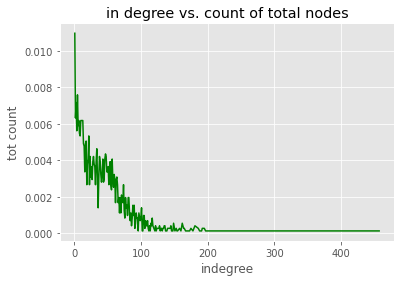

In [144]:
# Plot for in degree distribution
plt.plot(u1, c1, color ='g')
plt.xlabel("indegree")
plt.ylabel("tot count")
plt.title("in degree vs. count of total nodes")

Text(0.5, 1.0, 'in degree vs. count of total nodes')

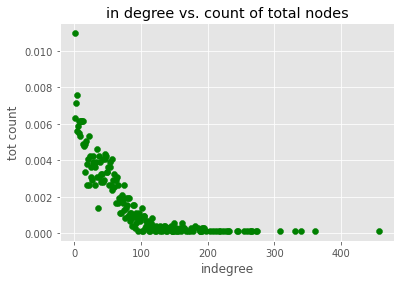

In [145]:
# Scatter plot for in degree distribution
plt.scatter(u1, c1, color = 'g')
plt.xlabel("indegree")
plt.ylabel("tot count")
plt.title("in degree vs. count of total nodes")

Text(0.5, 1.0, 'in degree vs. count of total nodes')

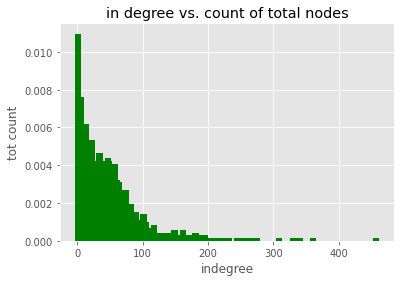

In [146]:
# bar plot
plt.bar(u1, c1, color ='g', width=10)
plt.xlabel("indegree")
plt.ylabel("tot count")
plt.title("in degree vs. count of total nodes")

Out degree

In [147]:
len1=len(fin_nodes)
deg_in=[]
g1=graph_adjacency_list.items()
print(g1)
for kf in g1:
  deg_in.append(len((kf[1])))
u1,c1=np.unique(deg_in,return_counts=True)
c1=c1.astype(float)
h=0
while(h< len(c1)):
  c1[h]=c1[h]/len1
  h=h+1;
c1

dict_items([(30, [1412, 3352, 5254, 5543, 7478]), (3, [28, 30, 39, 54, 108, 152, 178, 182, 214, 271, 286, 300, 348, 349, 371, 567, 581, 584, 586, 590, 604, 611, 8283]), (25, [3, 6, 8, 19, 23, 28, 29, 30, 33, 35, 50, 54, 55, 75, 80, 86, 94, 127, 152, 154, 182, 192, 214, 224, 226, 246, 252, 255, 257, 261, 271, 273, 280, 282, 286, 299, 300, 302, 306, 308, 310, 322, 325, 339, 348, 349, 356, 358, 363, 370, 371, 373, 377, 379, 407, 415, 422, 428, 439, 488, 514, 545, 549, 560, 590, 592, 600, 604, 611, 645, 650, 659, 664, 667, 673, 675, 696, 706, 723, 739, 756, 857, 864, 893, 959, 994, 1131, 3755, 8282, 8284]), (4, [8, 10, 28, 30, 38, 55, 56, 75, 130, 140, 147, 151, 152, 214, 232, 243, 282, 299, 341, 363, 370, 415, 560, 606, 611, 645, 650, 659, 8282]), (5, [6, 8, 10, 23, 30, 33, 38, 50, 54, 55, 61, 75, 89, 93, 127, 130, 147, 153, 163, 167, 168, 175, 299]), (6, [3, 8, 10, 19, 23, 28, 29, 30, 33, 34, 35, 38, 39, 50, 54, 55, 56, 61, 80, 86, 89, 93, 94, 127, 130, 132, 135, 140, 147, 151, 153, 154,

array([3.34785664e-01, 9.89458890e-02, 5.63598032e-02, 3.92129304e-02,
       2.27687983e-02, 2.23471539e-02, 1.84118060e-02, 1.54602952e-02,
       1.27898805e-02, 1.11033029e-02, 1.05411103e-02, 9.55727337e-03,
       8.57343640e-03, 7.87069571e-03, 8.01124385e-03, 6.74631061e-03,
       4.49754041e-03, 6.18411806e-03, 5.62192551e-03, 4.49754041e-03,
       4.35699227e-03, 4.21644413e-03, 3.23260717e-03, 4.07589599e-03,
       2.67041462e-03, 3.37315531e-03, 2.81096275e-03, 3.51370344e-03,
       3.93534786e-03, 3.23260717e-03, 3.51370344e-03, 2.24877020e-03,
       3.09205903e-03, 2.10822207e-03, 2.52986648e-03, 2.24877020e-03,
       2.10822207e-03, 1.68657765e-03, 3.23260717e-03, 1.40548138e-03,
       3.37315531e-03, 1.96767393e-03, 1.40548138e-03, 3.23260717e-03,
       2.24877020e-03, 1.82712579e-03, 1.82712579e-03, 1.68657765e-03,
       1.54602952e-03, 2.38931834e-03, 8.43288826e-04, 1.68657765e-03,
       1.12438510e-03, 1.12438510e-03, 1.12438510e-03, 7.02740689e-04,
      

Text(0.5, 1.0, 'out degree vs. count of total nodes')

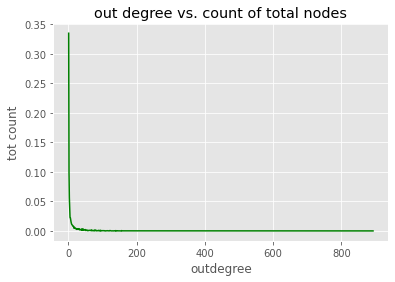

In [148]:
# Plot for out degree distribution
plt.plot(u1, c1, color ='g')
plt.xlabel("outdegree")
plt.ylabel("tot count")
plt.title("out degree vs. count of total nodes")

Text(0.5, 1.0, 'out degree vs. count of total nodes')

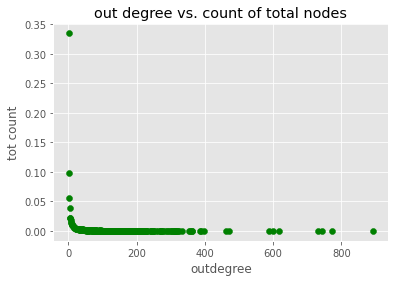

In [149]:
# Scatter plot
plt.scatter(u1, c1, color = 'g')
plt.xlabel("outdegree")
plt.ylabel("tot count")
plt.title("out degree vs. count of total nodes")

Text(0.5, 1.0, 'out degree vs. count of total nodes')

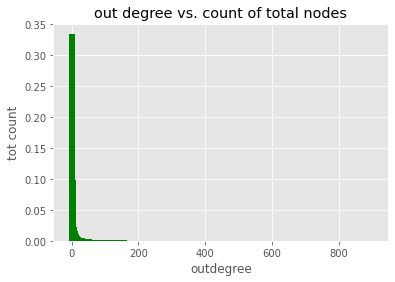

In [150]:
# Bar plot
plt.bar(u1, c1, color = 'g',width=20)
plt.xlabel("outdegree")
plt.ylabel("tot count")
plt.title("out degree vs. count of total nodes")


2. [10 points] Calculate the local clustering coefficient of each node and plot the clustering-coefficient
distribution of the network.

2. [10 points] Calculate the local clustering coefficient of each node and plot the clustering-coefficient
distribution of the network.

In [151]:
# Function to find all the unique neighbour nodes
def getneigbours(n1,n2):
  return np.where(n2[n1]>0)[0]

In [152]:
# undirected part
C2={}
# Creating another adjacency matrix where the graph is considered to be un directed
graph_new_adjacency_matrix=np.zeros((max(fin_nodes)+1, max(fin_nodes)+1),dtype=np.int64)
for i in range(0,len(list_edges)):
  x1=list_edges[i]
  source=x1[0]
  destination=x1[1] 
  graph_new_adjacency_matrix[source][destination]=1
  graph_new_adjacency_matrix[destination][source]=1
array_graph_matrix=np.array(graph_new_adjacency_matrix)

# finding the clustering coefficient
for i in fin_nodes:
  nodep=i
  coeff=0
  neibours= getneigbours(nodep,array_graph_matrix)
  if(len(neibours)!=1):
    for neibour1 in neibours:
      for neibour2 in neibours:
        if(neibour1 != neibour2):
          if(array_graph_matrix[neibour1][neibour2]==1):
            coeff=coeff+1
        else:
          continue
    coeff=coeff/2
    coeff=coeff/ (len(neibours)*(len(neibours)-1)/2)
    C2[nodep]=coeff
        
  else:
    C2[nodep]=coeff
    continue
print(C2)

{3: 0.2196078431372549, 4: 0.23399014778325122, 5: 0.34782608695652173, 6: 0.06395881239698012, 7: 0.15217391304347827, 8: 0.09788359788359788, 9: 0.09907407407407408, 10: 0.1443001443001443, 11: 0.04861546944890859, 12: 0.09471153846153846, 13: 0.21818181818181817, 14: 0.05604719764011799, 15: 0.05983728997691443, 16: 0.21904761904761905, 17: 0.15757575757575756, 18: 0.21212121212121213, 19: 0.30200501253132833, 20: 0.06198608475648324, 21: 0.05754385964912281, 22: 0.0, 23: 0.15790731008122313, 24: 0.07653511537006683, 25: 0.1867665418227216, 26: 0.1122060470324748, 27: 0.07202484954377791, 28: 0.08767799506360358, 29: 0.10445044253342539, 30: 0.15079365079365079, 31: 0.08571428571428572, 32: 0.18382352941176472, 33: 0.21688311688311687, 34: 0.2727272727272727, 35: 0.15118223071411513, 36: 0.10292364640190726, 37: 0.12105263157894737, 38: 0.3475783475783476, 39: 0.18842805939580134, 40: 0.18181818181818182, 41: 0.12413793103448276, 42: 0.06639427987742594, 43: 0.16666666666666666, 44:

In [153]:
D1= C2.values()
tot_di= np.array(list(D1))
u11, c11= np.unique(np.array(list(D1)),return_counts=True)
c11= c11.astype(float)


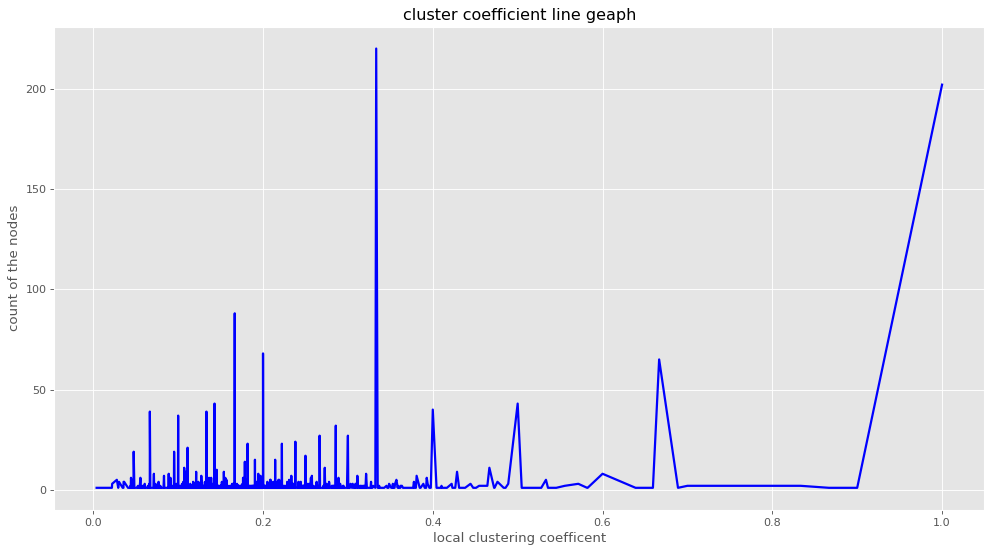

In [154]:
# Plotting Clustering coefficient distribution
style.use('ggplot')
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(u11[1:],c11[1:],color ='b',linewidth = 2)
plt.title('cluster coefficient line geaph')
plt.xlabel('local clustering coefficent')
plt.ylabel('count of the nodes')
plt.show()

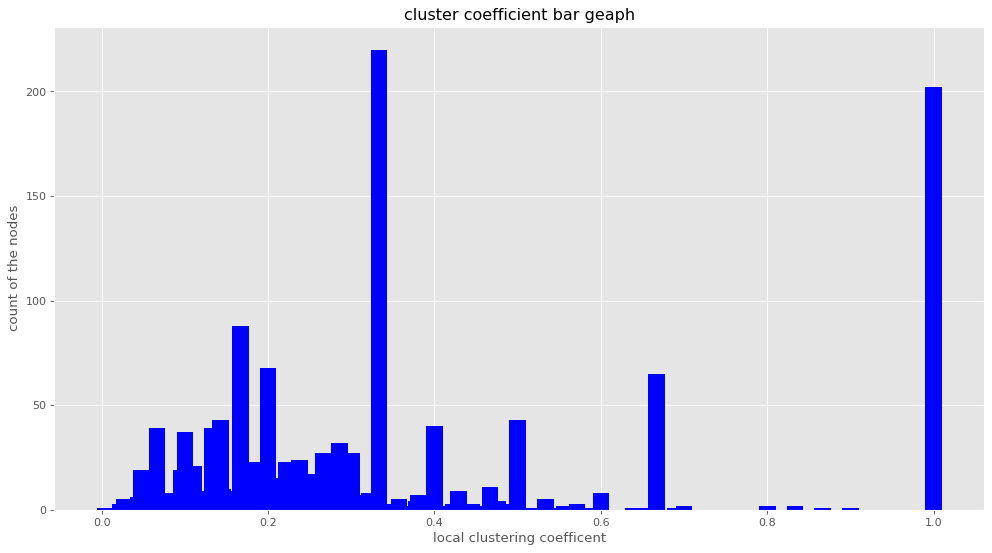

In [155]:
# Bar Plot
from matplotlib import style

style.use('ggplot')
plt.figure(figsize=(15, 8), dpi=80)
plt.bar(u11[1:],c11[1:],color ='b',width = 0.02)
plt.title('cluster coefficient bar geaph')
plt.xlabel('local clustering coefficent')
plt.ylabel('count of the nodes')
plt.show()

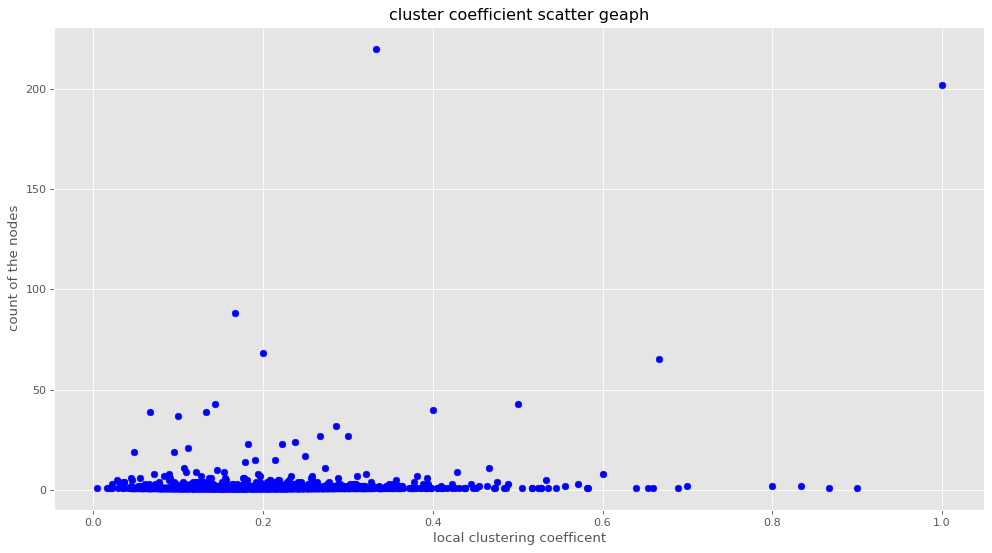

In [156]:
# Scatter Plot
from matplotlib import style

style.use('ggplot')
plt.figure(figsize=(15, 8), dpi=80)
plt.scatter(u11[1:],c11[1:],color ='b',)
plt.title('cluster coefficient scatter geaph')
plt.xlabel('local clustering coefficent')
plt.ylabel('count of the nodes')
plt.show()

Question 2 - [35 points] PageRank, Hubs and Authority
For the dataset chosen in the above question, calculate the following:
1. [15 points] PageRank score for each node
2. [15 points] Authority and Hub score for each node
[5 points] Compare the results obtained from both the algorithms in parts 1 and 2 based on the node
scores.

In [157]:
# Creating a digraph
import networkx as nt
digraph1 = nt.DiGraph()
digraph1.add_nodes_from(fin_nodes)

digraph1.add_edges_from(list_edges)


In [158]:
print(digraph1.nodes)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 230, 231, 232, 

In [159]:
# Calculating the page rank values
page_rank=nt.pagerank(digraph1,alpha=0.8)
page_rank

{3: 0.00020192490435020787,
 4: 5.522683582556362e-05,
 5: 5.522683582556362e-05,
 6: 0.00030768520129828417,
 7: 5.522683582556362e-05,
 8: 0.0003247500641576646,
 9: 5.522683582556362e-05,
 10: 0.0004015683944144109,
 11: 5.522683582556362e-05,
 12: 5.522683582556362e-05,
 13: 5.522683582556362e-05,
 14: 5.522683582556362e-05,
 15: 0.003542574133664394,
 16: 5.522683582556362e-05,
 17: 5.522683582556362e-05,
 18: 5.522683582556362e-05,
 19: 0.00013112107301315525,
 20: 5.522683582556362e-05,
 21: 5.522683582556362e-05,
 22: 5.522683582556362e-05,
 23: 0.00016618384342091373,
 24: 5.522683582556362e-05,
 25: 5.522683582556362e-05,
 26: 5.522683582556362e-05,
 27: 5.522683582556362e-05,
 28: 0.0016613928660259754,
 29: 0.000181860030128808,
 30: 0.00017188677837087036,
 31: 5.522683582556362e-05,
 32: 0.00019395249878119536,
 33: 0.0003382906014643417,
 34: 0.0002646658938008549,
 35: 0.0006623155144355352,
 36: 0.00013983036116626765,
 37: 5.522683582556362e-05,
 38: 0.000160657474383

In [169]:
page_rank1=nt.pagerank(digraph1,alpha=0.9)
page_rank1

{3: 0.0002062819901943276,
 4: 4.581231020070466e-05,
 5: 4.581231020070466e-05,
 6: 0.00031220818742428623,
 7: 4.581231020070466e-05,
 8: 0.00032584142656243566,
 9: 4.581231020070466e-05,
 10: 0.00045627415000783585,
 11: 4.581231020070466e-05,
 12: 4.581231020070466e-05,
 13: 4.581231020070466e-05,
 14: 4.581231020070466e-05,
 15: 0.003809649168763395,
 16: 4.581231020070466e-05,
 17: 4.581231020070466e-05,
 18: 4.581231020070466e-05,
 19: 0.00012947441467921382,
 20: 4.581231020070466e-05,
 21: 4.581231020070466e-05,
 22: 4.581231020070466e-05,
 23: 0.00017607890378821628,
 24: 4.581231020070466e-05,
 25: 4.581231020070466e-05,
 26: 4.581231020070466e-05,
 27: 4.581231020070466e-05,
 28: 0.0017206714283412971,
 29: 0.00018689212710036346,
 30: 0.00017420714783247438,
 31: 4.581231020070466e-05,
 32: 0.0001931017550701841,
 33: 0.00033596358399433775,
 34: 0.00025324862392428135,
 35: 0.0007383849560825618,
 36: 0.00013648969104873486,
 37: 4.581231020070466e-05,
 38: 0.00016890586

In [160]:
# Calculating the hubs and authority scores using hits algo
hubs,auth=nt.hits(digraph1)


In [161]:
print(hubs)

{3: 4.0210316397776356e-05, 4: 7.319607685824178e-05, 5: 3.501788474433637e-05, 6: 0.0010539872861763616, 7: 8.200618013274943e-05, 8: 0.00032001233330871483, 9: 0.00023181963355171445, 10: 0.00018207047608178445, 11: 0.004921182063808106, 12: 0.00028822862451763316, 13: 3.120053955681931e-05, 14: 0.0004975871202612586, 15: 0.00041573260338093835, 16: 8.409812451935363e-05, 17: 0.00010084393686112592, 18: 3.6170086560198036e-05, 19: 7.2174737201482e-05, 20: 0.0008868292175658342, 21: 0.0002928634622208906, 22: 6.217339200066012e-06, 23: 0.0001813438207942293, 24: 0.0026453591090555948, 25: 0.00021311562589770768, 26: 0.0001458915638968582, 27: 0.000519619051539597, 28: 0.0003569336095194367, 29: 0.0006751699797052775, 30: 7.925509536668041e-05, 31: 3.701485755755211e-05, 32: 1.3200870183843292e-05, 33: 6.990816089010813e-05, 34: 8.007226195926259e-06, 35: 0.0002194258352811276, 36: 0.001903126307817955, 37: 0.00019759687828962242, 38: 4.9473774019337114e-05, 39: 0.00010662223573949801,

In [162]:
print(auth)

{3: 9.501171858460723e-05, 4: -0.0, 5: -0.0, 6: 6.398065594290148e-05, 7: -0.0, 8: 0.0001877668019492139, 9: -0.0, 10: 6.848818550186198e-05, 11: -0.0, 12: -0.0, 13: -0.0, 14: -0.0, 15: 0.0022015434925655806, 16: -0.0, 17: -0.0, 18: -0.0, 19: 0.00012068234426719099, 20: -0.0, 21: -0.0, 22: -0.0, 23: 9.608194643858445e-05, 24: -0.0, 25: -0.0, 26: -0.0, 27: -0.0, 28: 0.0002547506139075197, 29: 0.00020033705888880288, 30: 9.50895483582222e-05, 31: -0.0, 32: 4.006198413324025e-05, 33: 0.00013718996673519202, 34: 9.147820801478798e-05, 35: 0.0006058524803373782, 36: 0.00022001355409957777, 37: -0.0, 38: 7.24509027838512e-05, 39: 6.1329505036077e-05, 40: -0.0, 41: -0.0, 42: -0.0, 43: -0.0, 44: -0.0, 45: -0.0, 46: -0.0, 47: -0.0, 48: -0.0, 49: 6.494368214024959e-05, 50: 0.00014146112469263865, 51: -0.0, 52: -0.0, 53: -0.0, 54: 0.0001402071358643649, 55: 0.00017273040211628676, 56: 0.0009964078923843512, 57: -0.0, 58: -0.0, 59: -0.0, 60: -0.0, 61: 8.598466643422288e-05, 62: -0.0, 63: -0.0, 64:

In [163]:
import networkx as nt
digraph = nt.DiGraph()
digraph.add_nodes_from(fin_nodes)

digraph.add_edges_from(list_edges)


In [164]:
# Clustering the digraph
nt.clustering(digraph)

{3: 0.12745098039215685,
 4: 0.13669950738916256,
 5: 0.191699604743083,
 6: 0.03712770692624775,
 7: 0.09239130434782608,
 8: 0.05986386528171231,
 9: 0.05416666666666667,
 10: 0.08746038034865293,
 11: 0.02612160941473519,
 12: 0.051201923076923075,
 13: 0.11818181818181818,
 14: 0.030740568234746156,
 15: 0.03357983073581255,
 16: 0.11904761904761904,
 17: 0.08787878787878788,
 18: 0.12878787878787878,
 19: 0.17552026286966046,
 20: 0.03306307860387557,
 21: 0.030526315789473683,
 22: 0,
 23: 0.0901009657594381,
 24: 0.04190308073803219,
 25: 0.10074906367041199,
 26: 0.060582306830907054,
 27: 0.03805086390992041,
 28: 0.055098887515451174,
 29: 0.06375117189654221,
 30: 0.08068783068783068,
 31: 0.05238095238095238,
 32: 0.10197368421052631,
 33: 0.13264688067837674,
 34: 0.17953020134228187,
 35: 0.08370044052863436,
 36: 0.05953363598844408,
 37: 0.06842105263157895,
 38: 0.20822281167108753,
 39: 0.1232905982905983,
 40: 0.09090909090909091,
 41: 0.07241379310344828,
 42: 0.036

In [165]:
z1= sorted(hubs.items(), key=lambda x: x[1], reverse=True)
z2=sorted(auth.items(), key=lambda x: x[1], reverse=True)

In [177]:
high_hub=[]
high_hub1=[]
for i in range(0,20): # top 20 highest hubs values with nodes
  high_hub.append(z1[i])
  high_hub1.append(z1[i][0])
print(high_hub)

[(2565, 0.007940492708143142), (766, 0.00757433529750125), (2688, 0.006440248991029863), (457, 0.006416870490261073), (1166, 0.006010567902411203), (1549, 0.005720754058269245), (11, 0.004921182063808106), (1151, 0.00457204070175641), (1374, 0.004467888792711109), (1133, 0.003918881732057349), (2485, 0.0037844608130803746), (2972, 0.0035176739768147175), (3449, 0.003503558110460446), (3453, 0.0034494148611122102), (4967, 0.0034433407418341284), (3352, 0.003381423106344999), (2871, 0.0032390167017277093), (5524, 0.0031957811103467994), (3642, 0.003156068703698416), (1608, 0.0031218439181332205)]


In [178]:
high_auth=[]
high_auth1=[]
for i in range(0,20): # top 20 highest authority values with nodes
  high_auth.append(z2[i])
  high_auth1.append(z2[i][0])
print(high_auth)

[(2398, 0.0025801471780088738), (4037, 0.002573241124229792), (3352, 0.002328415091497682), (1549, 0.0023037314804571782), (762, 0.0022558748562871394), (3089, 0.002253406688451163), (1297, 0.0022501446366627216), (2565, 0.0022235641039536117), (15, 0.0022015434925655806), (2625, 0.0021978968034030723), (2328, 0.0021723715453407385), (2066, 0.002107040939609974), (4191, 0.002081194130528987), (3456, 0.0020504355215107775), (737, 0.0020393826293356693), (3537, 0.001957956707591016), (2576, 0.0019547902768889494), (4712, 0.0018716357520568287), (5412, 0.001869411316148911), (2535, 0.0018680659041295823)]


In [179]:
z3= sorted(page_rank.items(), key=lambda x: x[1], reverse=True)
high_page=[]
high_page1=[]
for i in range(0,20): # top 20 page rank nodes with values 
  high_page.append(z3[i])
  high_page1.append(z3[i][0])
print(high_page)

[(4037, 0.004519226433837481), (15, 0.003542574133664394), (6634, 0.003219620121295294), (2625, 0.0031132124801420877), (2470, 0.002534998738509616), (2237, 0.0024801691288450353), (2398, 0.002444997985780813), (4191, 0.0021656867122448833), (5254, 0.0020651885536163467), (7553, 0.00205061803681289), (1186, 0.002039336465667129), (2328, 0.0019534065380085296), (7620, 0.0018431652962861342), (1297, 0.001841599949043567), (4335, 0.0018140365096805504), (4875, 0.0017943596060918613), (7632, 0.00177292160346536), (5412, 0.0017709255275136955), (2654, 0.001731686613775378), (3352, 0.0016975220947357606)]


In [180]:
print(high_page1)

[4037, 15, 6634, 2625, 2470, 2237, 2398, 4191, 5254, 7553, 1186, 2328, 7620, 1297, 4335, 4875, 7632, 5412, 2654, 3352]


In [182]:
def common_member(a, b):   
    a_set = set(a)
    b_set = set(b)
     
    # check length
    if len(a_set.intersection(b_set)) > 0:
        return(a_set.intersection(b_set)) 



In [183]:
print(common_member(high_auth1,high_page1))

{3352, 2625, 5412, 4037, 15, 1297, 2328, 2398, 4191}


In [184]:
print(common_member(high_auth1,high_hub1))

{3352, 1549, 2565}


In [185]:
print(common_member(high_hub1,high_page1))

{3352}
